# 3조의 진행 과정

### 1. JustWatch 크롤링 및 EDA

### 2. IMDb 크롤링

### 3. 데이터 프레임 병합

### 4. 생각해볼 점

In [2]:
# 모듈 불러오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

In [63]:
# 한국어 설정
from matplotlib import font_manager, rc
rc('font', family='Malgun Gothic')

## 1. JustWatch 크롤링 및 EDA

In [35]:
# 데이터 불러오기
justwatch = pd.read_excel('./justwatch_second_1090.xlsx', index_col=0)
justwatch.head()

,title,original_title,year,season_episode,runtime,genre,age_rating,Production country,IMDb_title,IMDb_URL
0,Ojingeo Geim,Squid Game,2021,2,55min,"액션, 드라마, 스릴러",19,대한민국,Squid Game (TV Series 2021),https://www.imdb.com/title/tt10919420/
1,12인의 심판자,The Twelve,2019,2,54min,"드라마, 스릴러",NaN,벨기에,The Twelve (TV Series 2019–2023),https://www.imdb.com/title/tt7605396/
2,희생자 게임,誰是被害者,2020,2,1시간 0분,"드라마, 범죄, 스릴러",19,대만,The Victims' Game (TV Series 2020),https://www.imdb.com/title/tt12079212/
3,스위트 투스: 사슴뿔을 가진 소년,Sweet Tooth,2021,3,52min,"SF, 드라마, 판타지, 액션",15,미국,Sweet Tooth (TV Series 2021),https://www.imdb.com/title/tt12809988/
4,Sweet Home,NaN,2020,3,1시간 0분,"스릴러, 드라마, 판타지, 공포, SF, 범죄",NaN,대한민국,Sweet Home (TV Series 2020),https://www.imdb.com/title/tt11612120/


### JustWatch 컬럼
- 제목, 원제, 연도, 시즌 수, 재생 시간, 장르, 영상물 등급, 제작 국가

- IMDb title, IMDb URL은 구글 검색을 통해 크롤링함

In [36]:
# 데이터 살펴보기
justwatch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1089
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               1090 non-null   object
 1   original_title      855 non-null    object
 2   year                1090 non-null   int64 
 3   season_episode      1090 non-null   int64 
 4   runtime             1090 non-null   object
 5   genre               1090 non-null   object
 6   age_rating          803 non-null    object
 7   Production country  1089 non-null   object
 8   IMDb_title          1088 non-null   object
 9   IMDb_URL            1088 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.7+ KB


### (1) 시즌

In [38]:
# 시즌 별 드라마 개수
justwatch['season_episode'].value_counts()

season_episode
1     752
2     176
3      71
4      36
7      16
5      16
6      13
8       4
9       3
11      1
10      1
17      1
Name: count, dtype: int64

In [12]:
# 시즌 2 이상 드라마 개수
# 338개
len(justwatch[justwatch['season_episode'] >= 2])

338

In [39]:
# 시즌이 8 이상인 드라마
justwatch[justwatch['season_episode'] >= 8]

,title,original_title,year,season_episode,runtime,genre,age_rating,Production country,IMDb_title,IMDb_URL
7,워킹 데드,The Walking Dead,2010,11,46min,"드라마, SF, 액션, 공포, 스릴러",19,미국,The Walking Dead (TV Series 2010–2022),https://www.imdb.com/title/tt1520211/
9,The Flash,NaN,2014,9,45min,"액션, 드라마, SF",15,미국,The Flash (TV Series 2014–2023),https://www.imdb.com/title/tt3107288/
12,Suits,NaN,2011,9,44min,"코미디, 드라마",15,미국,Suits (TV Series 2011–2019),https://www.imdb.com/title/tt1632701/
24,블랙리스트,The Blacklist,2013,10,43min,"스릴러, 범죄, 드라마",15,미국,The Blacklist (TV Series 2013–2023),https://www.imdb.com/title/tt2741602/
27,뱀파이어 다이어리,The Vampire Diaries,2009,8,42min,"SF, 판타지, 공포, 로맨스, 스릴러, 드라마",19,미국,The Vampire Diaries (TV Series 2009–2017),https://www.imdb.com/title/tt1405406/
29,하우스,House,2004,8,44min,"드라마, 스릴러",15,미국,House (TV Series 2004–2012),https://www.imdb.com/title/tt0412142/
56,덱스터,Dexter,2006,8,53min,"범죄, 드라마, 스릴러",19,미국,Dexter (TV Series 2006–2013),https://www.imdb.com/title/tt0773262/
60,Heartland,NaN,2007,17,44min,"드라마, 가족, 코미디",12,캐나다,Heartland (TV Series 2007– ),https://www.imdb.com/title/tt1094229/
61,길모어 걸스,Gilmore Girls,2000,8,46min,"코미디, 드라마",12,미국,Gilmore Girls (TV Series 2000–2007),https://www.imdb.com/title/tt0238784/
122,웬트워스,Wentworth,2013,9,46min,"드라마, 범죄, 스릴러",19,호주,Wentworth (TV Series 2013–2021),https://www.imdb.com/title/tt2433738/


### (2) 연도

In [18]:
# 연도
justwatch['year'].value_counts().head(20)

year
2022    182
2023    159
2021    152
2020    146
2019    134
2018    101
2016     65
2017     65
2015     24
2013     11
2014     10
2011      8
2012      6
2010      4
2005      3
2009      3
2007      3
2008      2
2004      2
2006      2
Name: count, dtype: int64

In [46]:
# 2018 이후에 방영된 드라마 개수
len(justwatch[justwatch['year'] >= 2018])

874

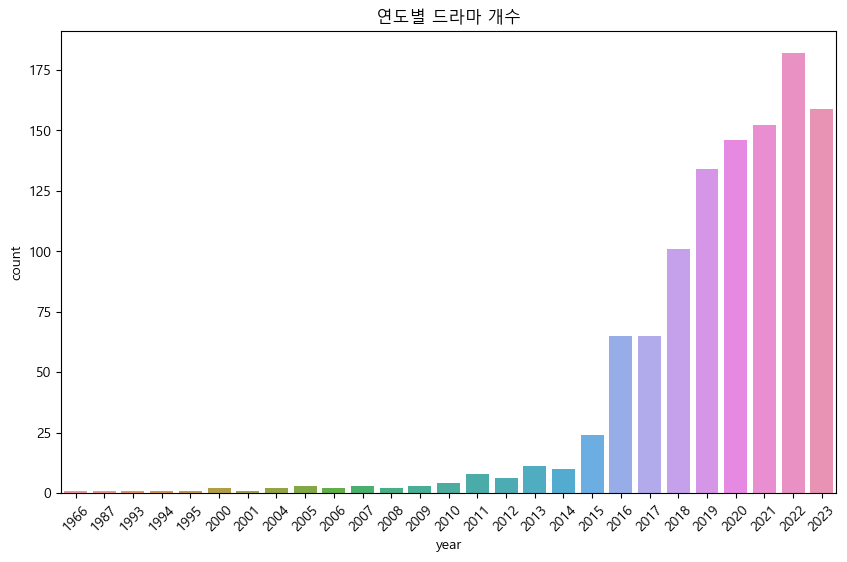

In [64]:
# 연도별 드라마 개수
plt.figure(figsize=(10, 6))
sns.countplot(data=justwatch, x='year')
plt.title('연도별 드라마 개수')
plt.xticks(rotation=45)
plt.show()

In [44]:
# 연도별 시즌의 개수, 평균 
justwatch.groupby(['year'])['season_episode'].agg(['count', 'mean'])

,count,mean
year,,
1966,1,3.000000
1987,1,7.000000
1993,1,7.000000
1994,1,7.000000
1995,1,7.000000
2000,2,4.500000
2001,1,4.000000
2004,2,4.500000
2005,3,1.333333


### (3) 제작 국가

In [47]:
# 제작 국가
len(justwatch['Production country'].unique()), justwatch['Production country'].unique()

(81,
 array(['대한민국', '벨기에', '대만', '미국', '덴마크', '독일', '일본', '태국', '캐나다', '그리스',
        '영국', 'China', '스페인', '미국, 영국',
        '아이슬란드, 덴마크, 핀란드, 스웨덴, 노르웨이, 독일, 프랑스, 영국', '미국, 프랑스', '호주', '스웨덴',
        '이탈리아', '케냐', 'WEBAPP_COUNTRY_VN', '인도', '호주, 미국', '스위스', '필리핀 제도',
        '영국, 미국', '남아프리카공화국', '폴란드', '브라질', '미국, 캐나다', '콜롬비아', '터키',
        '룩셈부르크', '핀란드', '이스라엘', '프랑스', '멕시코', '벨기에, 네덜란드', '덴마크, 노르웨이',
        '노르웨이', '러시아', '미국, 일본', '영국, 프랑스', '요르단', '프랑스, 미국', '캐나다, 영국',
        '태국, 미국', '인도네시아', '사우디아라비아', '영국, 인도', 'Arjantin', '아이슬란드',
        '오스트리아', '포르투갈', '프랑스, 독일, 스페인, 영국', '아일랜드, 영국', '캐나다, 프랑스, 독일',
        '이스라엘, 노르웨이', '대한민국, 미국', '미국, 대한민국', '네덜란드', '멕시코, 스페인', '홍콩',
        '칠레', '뉴질랜드, 호주', '나이지리아', '이집트', '일본, 미국', '미국, 멕시코', '쿠웨이트',
        '나이지리아, 미국', '말레이시아, 대만', '사우디아라비아, 인도', '벨기에, 룩셈부르크',
        '사우디아라비아, 튀니지, 이집트, 모로코, 레바논', nan, '독일, 오스트리아', '체코 공화국, 독일',
        '영국, 스페인', '스페인, 브라질', '레바논'], dtype=object))

In [78]:
# 제작 국가 상위 20개
country = []
for idx, row in justwatch[justwatch['Production country'].notnull()].iterrows():
    tmp_list= row['Production country'].split(', ')
    for x in tmp_list:
        country.append(x)

counts = Counter(country)
counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
for element, count in counts[:20]:
    print(f'{element}: {count}')

미국: 233
대한민국: 228
일본: 83
영국: 68
스페인: 52
China: 51
인도: 40
대만: 31
프랑스: 31
독일: 28
멕시코: 27
태국: 22
터키: 22
캐나다: 20
브라질: 20
호주: 18
폴란드: 17
이탈리아: 16
벨기에: 13
스웨덴: 13


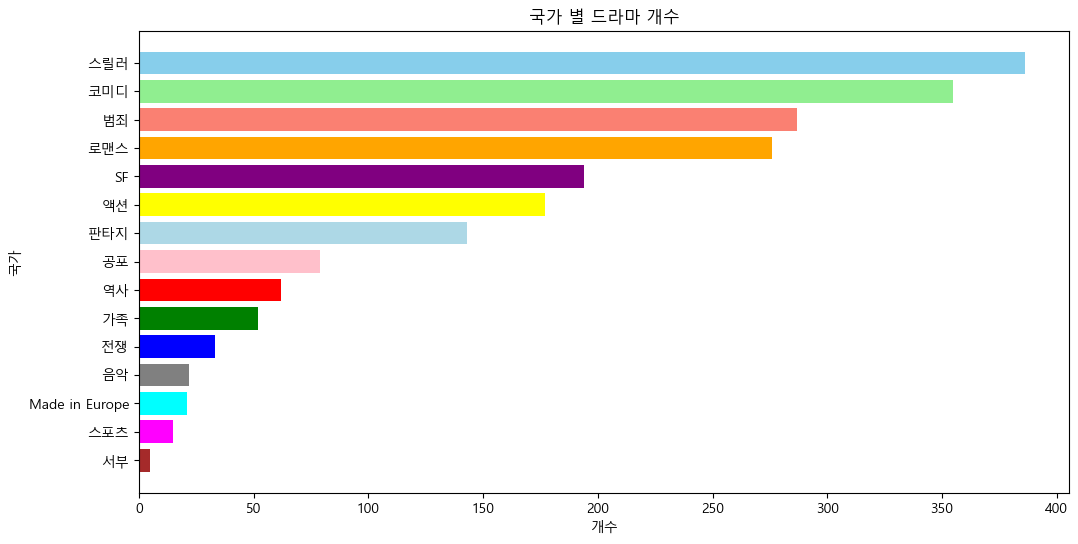

In [93]:
# 튜플의 각 요소를 분리
counts = counts[:20]
country, cnt = zip(*counts)
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple', 'yellow', 'lightblue', 'pink', 'red', 'green',
          'blue', 'gray', 'cyan', 'magenta', 'brown', 'olive', 'teal', 'lime', 'gold', 'navy']

# 국가별 드라마 개수 시각화
plt.figure(figsize=(12, 6))
plt.barh(country, cnt, color=colors)
plt.xlabel('개수')
plt.ylabel('국가')
plt.title('국가 별 드라마 개수')
plt.gca().invert_yaxis()  # y축 순서 뒤집기
plt.show()

### (4) 장르

In [81]:
# 장르
genre = []
for idx, row in justwatch.iterrows():
    tmp_list= row['genre'].split(', ')
    for x in tmp_list:
        genre.append(x)

counts = Counter(genre)
counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
for element, count in counts[1:]:
    print(f'{element}: {count}')

스릴러: 386
코미디: 355
범죄: 287
로맨스: 276
SF: 194
액션: 177
판타지: 143
공포: 79
역사: 62
가족: 52
전쟁: 33
음악: 22
Made in Europe: 21
스포츠: 15
서부: 5


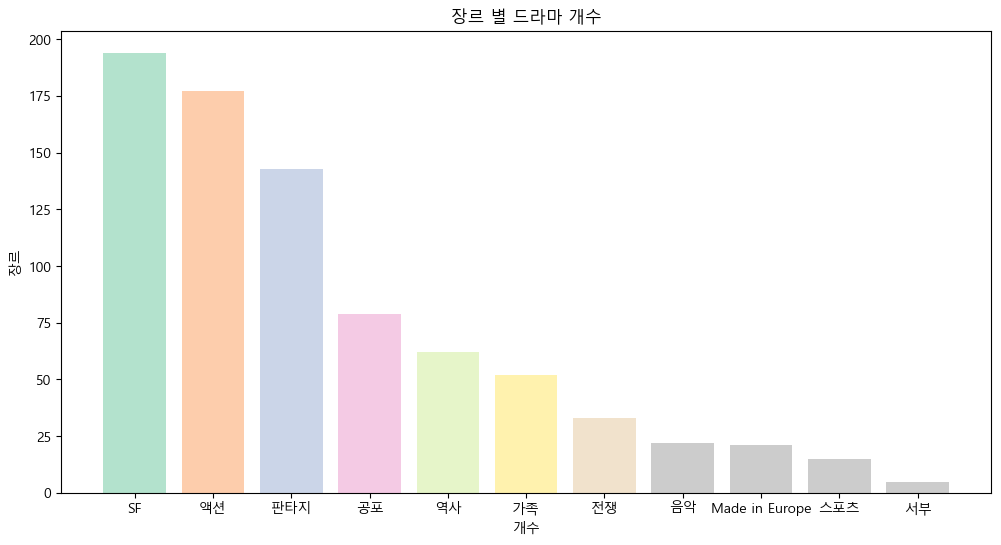

In [97]:
# 튜플의 각 요소를 분리
counts = counts[1:]
genre, cnt = zip(*counts)

# 국가별 드라마 개수 시각화
palette = plt.get_cmap('Pastel2')
plt.figure(figsize=(12, 6))
bars = plt.bar(genre, cnt, color=palette(np.arange(len(genre))))
plt.xlabel('개수')
plt.ylabel('장르')
plt.title('장르 별 드라마 개수')
plt.show()

### (5) 영상물 등급

In [45]:
# 영상물 등급
justwatch['age_rating'].value_counts().head(20)

age_rating
15     419
19     272
12      63
15+     37
12+      5
ALL      4
7        3
Name: count, dtype: int64

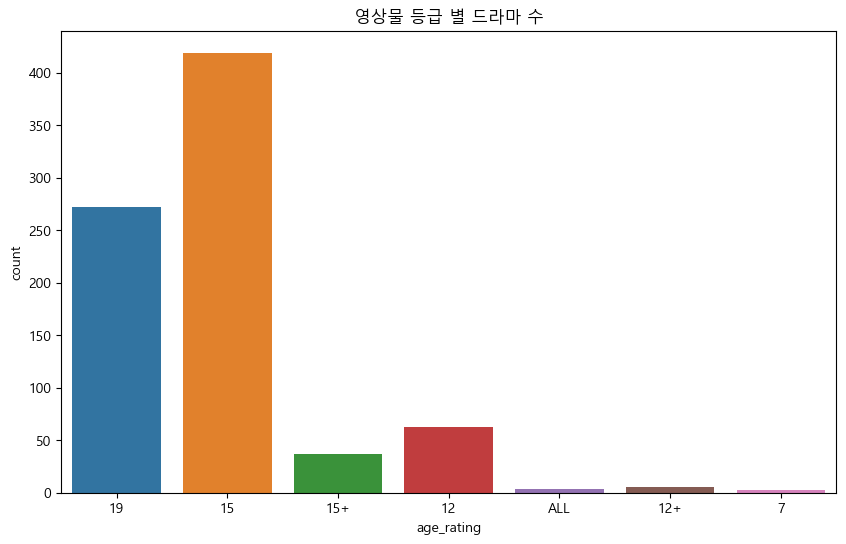

In [87]:
# 영상물 등급 별 드라마 수
plt.figure(figsize=(10, 6))
sns.countplot(data=justwatch, x='age_rating')
plt.title('영상물 등급 별 드라마 수')
plt.show()

### (6) 소결
- 시즌: 총 1090개 중 시즌 2 이상인 드라마가 338개로 생각외로 많았다. 시즌 8 이상인 드라마는 예전 작품이 많았다.

- 연도: 2018년부터 2023년까지 방영된 드라마가 874개로 대부분을 차지했다.

- 제조 국가: 80개국의 드라마가 존재한다. 결측치는 1개였으며, China, Arjantin 등 수정해야할 데이터가 있었다. 대한민국, 미국 작품이 각각 200개 이상을 차지했다.

- 장르: 스릴러, 코미디, 범죄, 로맨스, SF가 가장 인기 있는 장르로 꼽혔다.

- 영상물 등급: 15세 이상 시청가가 가장 많았고, 19세 이상 시청이 그 뒤를 이었다. 전체 이용가는 7개 뿐이었다.

## 2. IMDb 크롤링

In [50]:
# 데이터 불러오기
imdb = pd.read_excel('./imdb_final.xlsx', index_col=0, usecols='A:D, J:AN')
imdb.head()

,title,original_title,year,IMDb_title,IMDb_URL,total_rate,total_count,watchlist,popularity,user_review,...,season_11,season_12,season_13,season_14,season_15,season_16,season_17,director,writer,actor
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Ojingeo Geim,Squid Game,2021,Squid Game (TV Series 2021),https://www.imdb.com/title/tt10919420/,8.0,549K,25만,356,2.6K,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Hwang Dong-hyuk'],['Hwang Dong-hyuk'],"['Lee Jung-jae', 'Park Hae-soo', 'Yasushi Iwak..."
1,12인의 심판자,The Twelve,2019,The Twelve (TV Series 2019–2023),https://www.imdb.com/title/tt7605396/,7.4,6.5K,9.7천,"2,148",89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Kaat Beels', 'Wouter Bouvijn']","['Bert Van Dael', 'Nele Meirhaeghe', 'Roel Mon...","['Luc De Ruelle', 'Maaike Neuville', 'Tom Verm..."
2,희생자 게임,誰是被害者,2020,The Victims' Game (TV Series 2020),https://www.imdb.com/title/tt12079212/,7.3,1.9K,2.1천,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['David Chuang', 'Kuan-Chung Chen']","['Joyce Liu', 'Jui-Liang Hsu', 'Shih-Keng Chie...","['Wei-Ning Hsu', 'Hsiao-chuan Chang', 'Shih-Si..."
3,스위트 투스: 사슴뿔을 가진 소년,Sweet Tooth,2021,Sweet Tooth (TV Series 2021),https://www.imdb.com/title/tt12809988/,7.7,68K,9.6만,270,784,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Alexis Ostrander', 'Carol Banker', 'Ciarán F...","['Beth Schwartz', 'Bo Yeon Kim', 'Carly Woodwo...","['Nonso Anozie', 'Christian Convery', 'Stefani..."
4,Sweet Home,NaN,2020,Sweet Home (TV Series 2020),https://www.imdb.com/title/tt11612120/,7.3,33K,4.3만,957,516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Jang Young-woo', 'Lee Eung-bok', 'Park So-hy...","['Hong So-ri', 'Hwang Young-Chan', 'Kim Hyung-...","['Song Kang', 'Lee Jin-wook', 'Lee Si-young', ..."


### IMDb 컬럼
- 제목, 원제, 연도는 데이터 프레임 병합 시 활용

- IMDb_title, IMDb_URL은 IMDb에서 크롤링할 때 활용

- 전체 별점 (total_rate), 전체 별점의 인원 수 (total_count), 인기도 (popularity), 유저 리뷰 수 (user_review), 전문가 리뷰 수 (critic_review)

- 제작사 (production), 배급사 (distributor)

- 감독 (director), 작가 (writer), 배우 (actor)

- 시즌, 에피소드 별 별점, 별점의 인원 수

- age_miss는 영상물 등급 컬럼의 결측치를 채우기 위함

In [51]:
# 컬럼 이름
imdb.columns

Index(['title', 'original_title', 'year', 'IMDb_title', 'IMDb_URL',
       'total_rate', 'total_count', 'watchlist', 'popularity', 'user_review',
       'critic_review', 'age_miss', 'production', 'distributor', 'season_1',
       'season_2', 'season_3', 'season_4', 'season_5', 'season_6', 'season_7',
       'season_8', 'season_9', 'season_10', 'season_11', 'season_12',
       'season_13', 'season_14', 'season_15', 'season_16', 'season_17',
       'director', 'writer', 'actor'],
      dtype='object')

In [53]:
# 시즌 별 컬럼 예시
imdb['season_1']

Unnamed: 0
0       {'S1.E1': ['8.2', '16K'], 'S1.E2': ['7.5', '14...
1       {'S1.E1': ['7.3', '224'], 'S1.E2': ['7.2', '19...
2       {'S1.E1': ['7.4', '62'], 'S1.E2': ['7.6', '56'...
3       {'S1.E1': ['7.9', '2.5K'], 'S1.E2': ['8.1', '2...
4       {'S1.E1': ['7.1', '1.1K'], 'S1.E2': ['7.2', '9...
                              ...                        
1085    {'S1.E1': ['8.0', '44'], 'S1.E2': ['8.0', '33'...
1086                                                평점 없음
1087                                                평점 없음
1088                                                평점 없음
1089    {'S1.E1': ['6.5', '225'], 'S1.E2': ['6.5', '22...
Name: season_1, Length: 1090, dtype: object

In [52]:
# 데이터 살펴보기
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1089
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1090 non-null   object 
 1   original_title  855 non-null    object 
 2   year            1090 non-null   int64  
 3   IMDb_title      1087 non-null   object 
 4   IMDb_URL        1087 non-null   object 
 5   total_rate      1083 non-null   float64
 6   total_count     1083 non-null   object 
 7   watchlist       841 non-null    object 
 8   popularity      503 non-null    object 
 9   user_review     849 non-null    object 
 10  critic_review   809 non-null    float64
 11  age_miss        946 non-null    object 
 12  production      931 non-null    object 
 13  distributor     1054 non-null   object 
 14  season_1        1087 non-null   object 
 15  season_2        302 non-null    object 
 16  season_3        147 non-null    object 
 17  season_4        85 non-null     object

## 3. 데이터 프레임 병합

In [3]:
# 데이터 불러오기
final = pd.read_excel('./imdb_final_3_excel_수정본.xlsx', index_col=0)
final.head()

,title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,age_miss,production,...,justwatch_us_age,imdb_season_num,total_rate,total_count,watchlist,popularity,user_review,critic_review,imdb_title,imdb_url
0,Ojingeo Geim,Squid Game,2021,2,55,"액션, 드라마, 스릴러",19,대한민국,18,['Siren Pictures'],...,TV-MA,1,8.0,549000.0,250000.0,237.0,2600.0,109.0,Squid Game (TV Series 2021),https://www.imdb.com/title/tt10919420/
1,12인의 심판자,The Twelve,2019,2,54,"드라마, 스릴러",NaN,벨기에,18,"['Vlaamse Radio en Televisie (VRT)', 'Eyeworks...",...,NaN,2,7.4,6500.0,9800.0,2530.0,89.0,7.0,The Twelve (TV Series 2019–2023),https://www.imdb.com/title/tt7605396/
2,희생자 게임,The Victims' Game,2020,2,60,"드라마, 범죄, 스릴러",19,대만,18,"['Third Man Entertainment', 'Greener Grass Pro...",...,TV-MA,1,7.3,1900.0,2100.0,0.0,25.0,0.0,The Victims' Game (TV Series 2020),https://www.imdb.com/title/tt12079212/
3,스위트 투스: 사슴뿔을 가진 소년,Sweet Tooth,2021,3,52,"SF, 드라마, 판타지, 액션",15,미국,15,"['Warner Bros. Television', 'DC Entertainment'...",...,TV-14,2,7.7,68000.0,97000.0,41.0,791.0,86.0,Sweet Tooth (TV Series 2021),https://www.imdb.com/title/tt12809988/
4,Sweet Home,Sweet Home,2020,3,60,"스릴러, 드라마, 판타지, 공포, SF, 범죄",NaN,대한민국,18,"['Studio N', 'Studio Dragon', 'Netflix']",...,TV-MA,2,7.3,33000.0,43000.0,940.0,516.0,37.0,Sweet Home (TV Series 2020),https://www.imdb.com/title/tt11612120/


In [4]:
# tail
final.tail()

,title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,age_miss,production,...,justwatch_us_age,imdb_season_num,total_rate,total_count,watchlist,popularity,user_review,critic_review,imdb_title,imdb_url
904,레일라,Leila,2019,1,46,"드라마, 전쟁, SF",15,인도,15,"['Open Air Films', 'Tulsea', 'Netflix']",...,TV-MA,1,5.1,9300.0,2300.0,0.0,693.0,8.0,Leila (TV Series 2019),https://www.imdb.com/title/tt9337588/
905,100만 엔의 여인들,Million Yen Women,2017,1,30,"스릴러, 범죄, 드라마, 로맨스",19,일본,19,"['TV Tokyo', 'imageField']",...,연령 정보 없음,1,7.5,2100.0,1800.0,0.0,24.0,0.0,1000000 yen no Onnatachi (TV Mini Series 2017),https://www.imdb.com/title/tt6686450/
906,킬러 코미디언,Hasmukh,2020,1,33,"범죄, 드라마, 스릴러, 코미디",NaN,인도,18,"['Applause Entertainment Ltd.', 'Weirdass Come...",...,TV-MA,1,5.4,2800.0,0.0,0.0,201.0,5.0,Hasmukh (TV Mini Series 2020),https://www.imdb.com/title/tt9359294/
907,달러,Dollar,2019,1,41,"액션, 드라마, 로맨스",15,레바논,NaN,['Cedars Art Production - Sabbah Brothers'],...,연령 정보 없음,1,6.6,651.0,0.0,0.0,32.0,0.0,Dollar (TV Series 2019),https://www.imdb.com/title/tt10687564/
908,"엘리트들, 못다 한 이야기: 나디아 구스만",Elite Short Stories: Nadia Guzmán,2021,1,11,"드라마, 로맨스",NaN,스페인,TV-MA,"['Producciones Zeta', 'Zeta Ficción']",...,TV-MA,1,6.2,2100.0,1400.0,0.0,6.0,3.0,Elite Short Stories: Nadia Guzmán (TV Mini Ser...,https://www.imdb.com/title/tt14671790/


In [5]:
# 데이터 살펴보기
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 908
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               909 non-null    object 
 1   english_title       791 non-null    object 
 2   year                909 non-null    int64  
 3   total_season_num    909 non-null    int64  
 4   runtime             909 non-null    int64  
 5   genre               909 non-null    object 
 6   age_rating          653 non-null    object 
 7   production_country  909 non-null    object 
 8   age_miss            865 non-null    object 
 9   production          909 non-null    object 
 10  distributor         909 non-null    object 
 11  season_1            909 non-null    object 
 12  season_2            295 non-null    object 
 13  season_3            145 non-null    object 
 14  season_4            85 non-null     object 
 15  season_5            53 non-null     object 
 16  season_6     

## 4. 생각해볼 점

### 더 필요한 정보

- 더빙, 자막 지원 여부: 넷플릭스 사이트에서 크롤링하거나, 수기로 채워넣음

- 원작 유무:

- 오리지널 시리즈 유무: 제작사 (production) 에 넷플릭스가 존재하는지로 판단

- 인스타, 트위터, 유튜브

- 영미권 평점 사이트: MyDramaList, 로튼 토마토, 메타 크리틱

- 동양권 평점 사이트 한국은 왓챠 / 일본은 야후재팬 영화, 필름마크스

- 화제성: WordTracker, Google Keyword Ads

### 앞으로의 방향성
- '흥행'의 기준을 정의하고 인기 지표를 만들기: 평점, 리뷰 수, 시즌 수, watchlist, 또는 ...
- 상관관계 분석: 드라마의 총 시즌 수, 평점, 인기 지표 간 상관관계
- 연령 제한이 흥행에 미치는 영향